In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\Kartik\OneDrive\Desktop\Projects Loan status eda\train_loan.csv")
test = pd.read_csv(r"C:\Users\Kartik\OneDrive\Desktop\Projects Loan status eda\test_loan.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In this section, we will look at the structre of the train and test datasets. Firstly we will check the features present in dataset and then we will look at their data types

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable , i.e Loan_Status in the train dataset.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test data set  as the train dataset except Loan_Satus. We will predict the loan_Status using the modelbuilt using train dataset.

In [6]:
#print data _types for each variable

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#lets look at the shape of data

In [9]:
train.shape,test.shape

((614, 13), (367, 12))

In [10]:
# "We will do univariate analysis. It is the simplest form of analysing data where we can examine each variable individually.
# For Categorical variable we can use Frequency table or bar plots which will calculate the number of each category
# in a particular variable. For numerical features, probability density plots can be used to look at the distribution
# of the varible."

# Target Variable

In [11]:
# We will look  at the target variable , i.e. Loan_Status.
# As it is Categorical variable, let look at its frequency table, percentage distribution bar plot.

In [12]:
# Frequency table of a variable will give us the count of each category in that variable.

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# Normalize can set to True to print proportion instead of numbers 

In [15]:
train['Loan_Status'].value_counts(normalize= True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

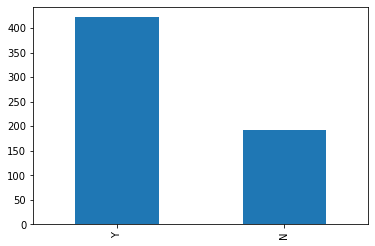

In [16]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422 (around 69%) people out of 614 was approved.

###### Now let us visualize each variable sepeartely. Different types of variables are Categorical, ordinal , numerical.
###### Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
###### Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property Area)
###### Numerical features: These features have numerical values (Application_Income, Coapplicant_Income, LoanAmount, Loan_Amount_Term)

In [17]:
# Let's visualize the categorical and ordinal features first

# Independent Variable (Categorical)

<AxesSubplot:title={'center':'Credit_History'}>

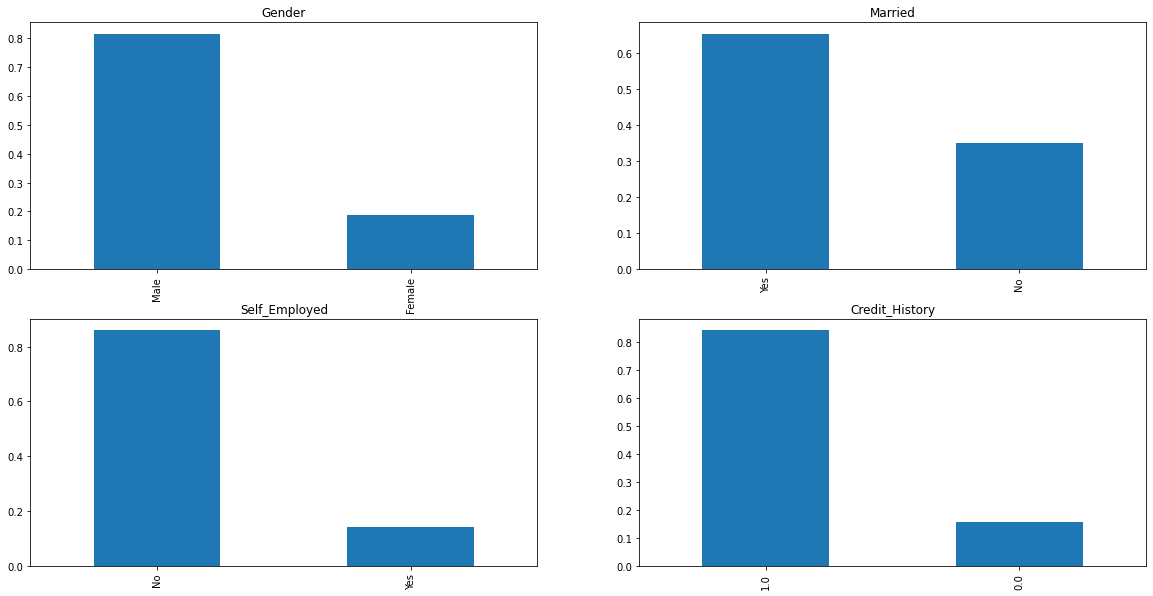

In [18]:
plt.figure(1), plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize=(20,10), title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize=(20,10), title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize=(20,10), title= 'Credit_History')

# It can be inferred from above bar plots that:

#### 80% applicants are Male.
#### Around 65% applicants are Married.
#### Around 15% applicants are are Self employed.
#### Around 85% applicants repaid the debts.

<AxesSubplot:title={'center':'Property_Area'}>

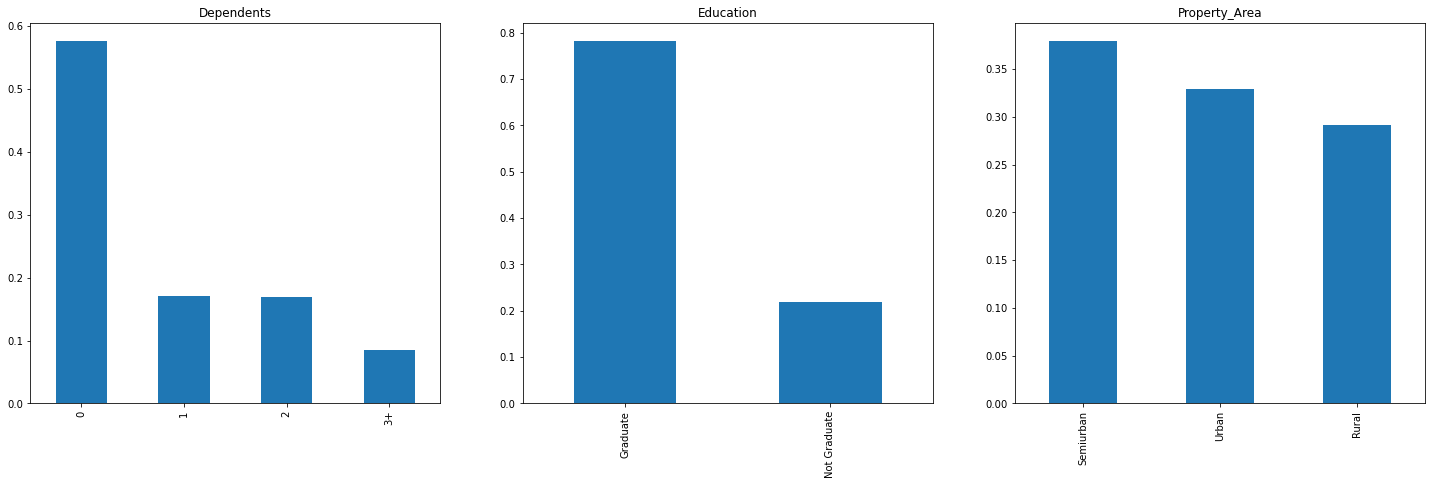

In [19]:
plt.figure(1), plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(25,7), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize=(25,7), title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize=(25,7), title= 'Property_Area')

# Following inferrence can be made from the above bar plots:
#### Most of the applicants don't have any dependent.
#### Around 80% of the applicants are Graduate.
#### Most of the applicants are from Semiurban area.

# Independent Variable (Numerical)

#### Till now we have seen categorical and ordinal variables and now let's visualize the numerical variables.
### Lets look at the distribution of Applicants Income first

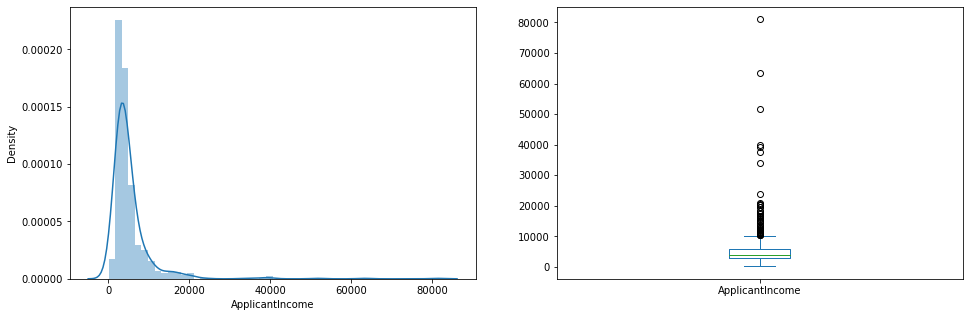

In [20]:
plt.figure(1),
plt.subplot(121), sns.distplot(train['ApplicantIncome']);
plt.subplot(122), train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

#### It can be inferred that most of the data in the distribution of applicant income is towards left,
#### which means it is not normally distributed. We will try to make it normally distributed.

#### The Box Plot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society.
#### Part of this can be driven by the fact that we are looking at people with different education levels.
#### Let us segregate them.

Text(0.5, 0.98, '')

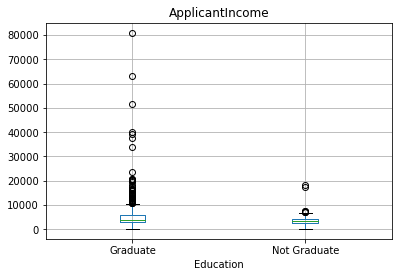

In [21]:
train.boxplot(column = 'ApplicantIncome', by = 'Education'),
plt.suptitle("")

#### We can see that there are a high number of graduate with very high incomes, which are appearing to be the outliers.

### Lets look at the Coapplicant income distribution.

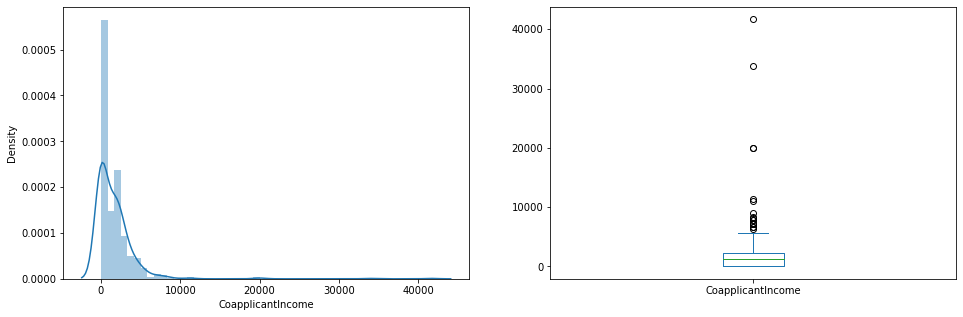

In [22]:
plt.figure(1),
plt.subplot(121), sns.distplot(train['CoapplicantIncome']);
plt.subplot(122), train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

#### We see a similar distribution as that of the applicant income.
#### Majority of coapplicant's income ranges from 0 to 5000.
#### We also see a lot of outliers in the coapplicant income and it is not normally distributed.

### Let's look at the distribution of LoanAmount variable.

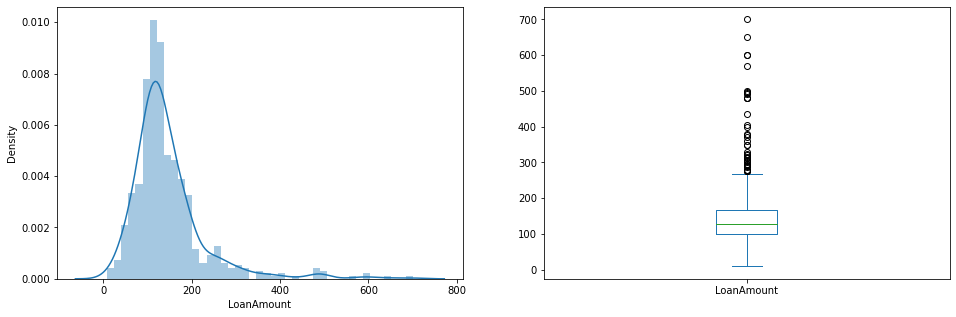

In [23]:
plt.figure(1),
plt.subplot(121),
df = train.dropna(),
sns.distplot(train['LoanAmount']);
plt.subplot(122), train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

#### We see a lot of outliers in this variable and the distribution is fairly Normal.
#### We will treat the outliers.

### Now we would like to know how well each feature correlate with Loan Status.

### Let's recall some hypotheses that we generated earlier
#### Applicant with high income should have more chances of loan approval.
#### Applicants who have repaid their previous debts should have higher chances of loan approval.
#### Loan approval should also depend on Loan amount. If the loan amount is less , chances of loan approval should be high.
#### Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [24]:
# After looking each variable individually we will now explore them with respect to the target variable.

# Categorical Independent Variable vs Target Variable

In [25]:
# First we will find relation between target variable and categorical independent variable.
# lets look at the stacked bar plot which will give us the proportion of approved and unapproved loans.

<AxesSubplot:xlabel='Gender'>

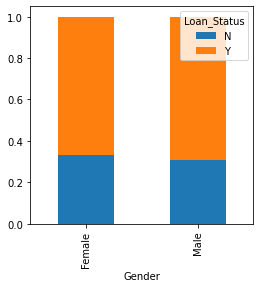

In [26]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

###### It can be inferred that the proportion of male and female applicant is more or less same for both approved and unapproved loans

<AxesSubplot:xlabel='Property_Area'>

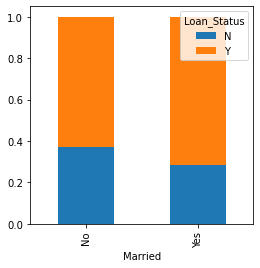

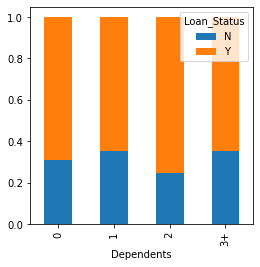

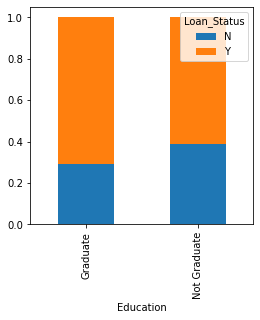

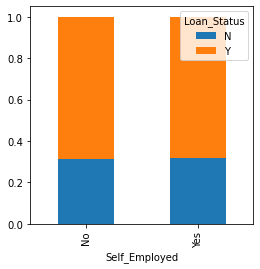

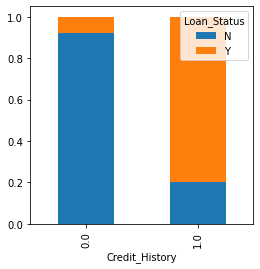

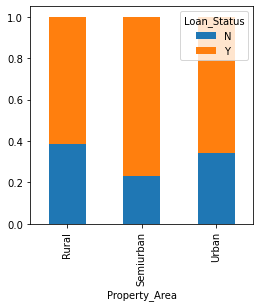

In [27]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

Education=pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))

###### Proportion of married applicants is higher for the approved loans.
###### Distribution of applicant with 1 or 3+ dependents is similar across both the categories of Loan_Status.
###### There is nothing significant we can infer from Self_Employed vs Loan_Status.
###### It seems we have credit history as 1 are more likely to get loans approved.
###### Proportion of Loans getting approved in semiurban area is higher as compared to that in Rural or urban areas.

# Numerical Independent Variable vs Target Variable

###### We will try to find mean income of people for which the loan has been approved vs the mean income of the people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

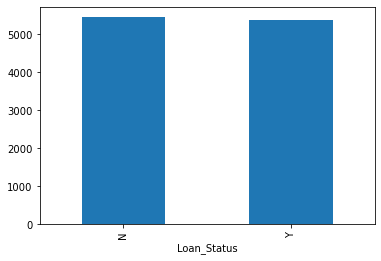

In [28]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

###### Here the y-axis represents the mean income of the applicant. We don't see any change in the mean income.
###### So lets make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [29]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Income_bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

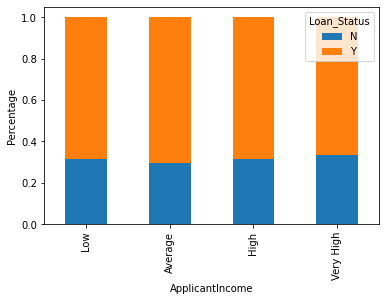

In [30]:
Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

###### It can be inferred that Applicant income does not affect the chance of loan approval which contradicts our hypothesis in which we assumed that if applicant income is high the chances of loan approval will alos be high.

### We will analyze the coapplicant income and loan amount variable in similar manner.

In [31]:
bins=[0,1000,3000,42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']= pd.cut(train['CoapplicantIncome'],bins,labels=group)

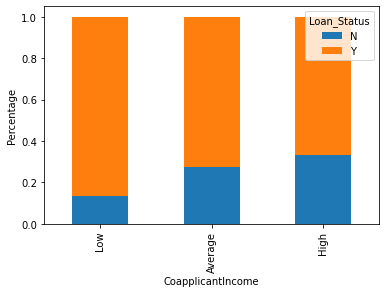

In [32]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

##### It shows that if coapplicant's income is the less chances of loan approval are high. But this does not look right. The possible reason behind this may be most of applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

#### Let's combine the Applicant and Coapplicant income and see the combined effect of Total Income on the Loan_Status

In [33]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [34]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']= pd.cut(train['Total_Income'],bins,labels=group)

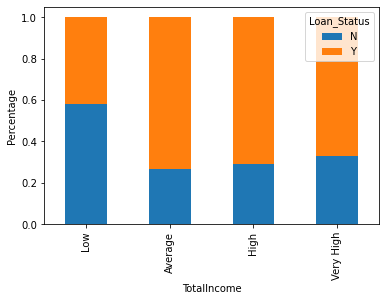

In [35]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('TotalIncome')
P=plt.ylabel('Percentage')

#### We can see that proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

### Lets visualize the Loan amount variable.

In [36]:
bins=[0,100,200,700]
group=['Low', 'Average', 'High']
train['Loan_Amount_bin']= pd.cut(train['LoanAmount'],bins,labels=group)

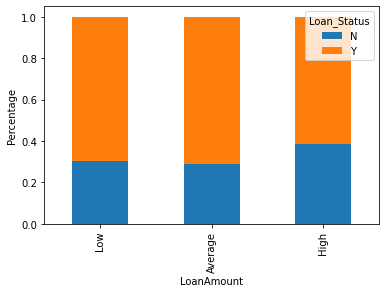

In [37]:
Loan_Amount_bin=pd.crosstab(train['Loan_Amount_bin'], train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

###### It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

###### Let's drop the bins we created for the exploration part. We will change the 3+ in dependent variables to 3 to make it a numerical variable . We will also convert the target variable's categories into 0 and 1 so that we can find it's correlation with numerical variables. One more reason to do so is few models like Logistic regression takes only numerical values as input. We will replace N with 0 and Y with 1.

In [38]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','Loan_Amount_bin','Total_Income_bin','Total_Income'], axis=1)

In [39]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

###### Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation . Heatmaps visualize data through variations in coloring. The variables with darker colour means their correlation is more.

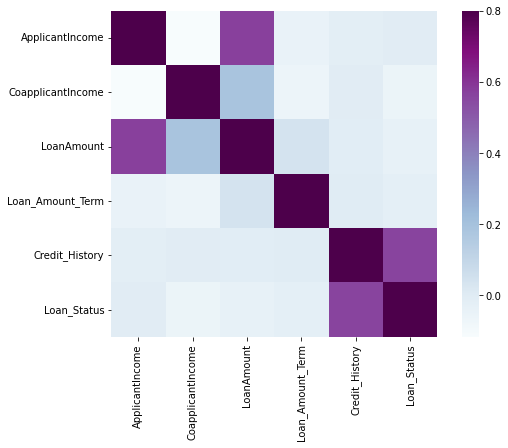

In [40]:
matrix=train.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

###### We see that the most correlated variables are ( Appliocantincome-LoanAmount) and (Credit_History - Loan_Status). Loan Amount is also correlated with CoapplicantIncome.

### After exploring all the variable in our data, we can now impute the missing values and treate the outliers because missing data and outliers can have adverse effect on model performance.

# Missing value imputation

In [41]:
# Let's list out feature-wise count of missing values.

In [42]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###### There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

In [43]:
# We will treate the missing values in all the features one by one.

###### We can consider these methods to fill the missing values :

In [44]:
# For Numerical Variables: imputation using mean or median
# For Categorical variables:imputation using mode 

In [45]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

###### Now let's try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [46]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
# It can be seen that in loan amount term variable, the value of 360 is repeating the most.
# So we will replace the missing values in the variable using the mode .

In [48]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

###### Now we will see the LoanAmount Variable. As it is a numerical variable, we can use mean or median to impute missing values. We will use median to fill the null values as earlier we saw that the LoanAmount have outliers so the mean will not be proper approach as it is highly affected by the presence of outliers. 

In [49]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [50]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###### As we see that all the missing values have been filled in the train dataset . Let's fill all the missing valuesin the test dataset too with the same approach.

In [51]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [52]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

###### As we saw earlier in uni univariate analysis, LoanAmount contains outliers so we have to treate them as the presence of outliers affects the distribution of data.

###### Let's visualize the effect of log transformation. we will do similar changes to test file simultaneously.

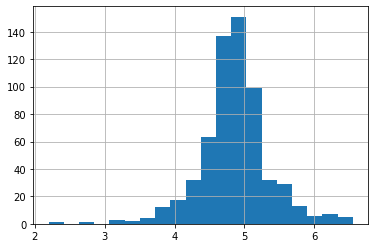

In [53]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

###### Now the distribution looks mjuch closer to normal  and effect of extreme values has been significantly subsided.

###### Lets'build a logistic regression model and make prediction for test data.

# Model building- Logistic Regression

In [54]:
# Lets drop the Loan_ID cariable as it do not have any effect on the Loan status.
# We will do the same changes to our test dataset which we did for further training dataset.

In [55]:
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

###### Sklearn requirs the target variable in a seperate dataset. So, we will drop our target variable from the train dataset and save it in another dataset

In [56]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

###### Now we will make dummy variables for our categorical variables.
Dummy variables turns categorical variables into a series of 0 and 1, making them lot easier too quantify and compare.

In [57]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

###### We will use the train_test_split function from sklearn to divide our train dataset. So first lets import train_test_split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

###### The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

###### Let's predict the Loan_Status for validation set and calculate its accuracy.

In [62]:
pred_cv= model.predict(x_cv)

###### Let's calculate how accurate our pprediction are by calculating the accuracy.

In [63]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

###### So our predictions are almost 84% accurate , i.e. we have identified 84% of the loan status correctly.

###### Let's make predictions for the test dataset

In [64]:
pred_test=model.predict(test)

In [65]:
submission=pd.read_csv(r"C:\Users\Kartik\OneDrive\Desktop\Projects Loan status eda\sample_submission.csv")

In [66]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

###### We need predictions in Y and N. So let's convert 1 and 0 to Y and N.

In [67]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [68]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [69]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

#### We got an accuracy of 0.7847 on Vidhya Analytics.

# Decision Tree

In [70]:
from sklearn import tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
pred_cv= model.predict(x_cv)

In [74]:
pred_test=model.predict(test)

In [75]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [76]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [77]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [78]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decission_tree.csv')